# Streaming Data on Twitter

Find the currently active and popular singer on Twitter.

In [1]:
# Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

Authorization Code to access Twitter API

In [3]:
access_token = 
access_token_secret = 
consumer_key = 
consumer_secret = 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Stream Tweets 

In [4]:
import json
import pandas as pd

class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, api=None):
        # inherit class attributes
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w+")

    def on_status(self, status):
        tweet = status._json
        
        self.file.write( json.dumps(tweet) + '\n' )
        
        self.num_tweets += 1
        if self.num_tweets < 500000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

# Initialize the Stream Listen
l = MyStreamListener()

# Authorization 
stream = tweepy.Stream(auth, l)

# Capture streaming data using my favoriate singers:
stream.filter(track=['Justin Bieber', 'Britney Spears', 'Ariana Grande', 'Selena Gomez', 'Shakira', 'Jennifer Lopez','Charlie Puth','Beyonce', 'Adele', 'Rihanna', 'Lady Gaga', 'Katy Perry', 'Shawn Mendes', 'Demi Lovato', 'Taylor Swift', 'Zara Larsson'], async=True)

Load and explore my Twitter data

In [34]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

import pandas as pd
pd.DataFrame(tweets_data).head(1)

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])
print(df.shape)

# Print the first few from DataFrame
print(df.head())

(2404, 2)
                                                text lang
0  RT @RapSpotlightss: Rihanna 😍 https://t.co/UNk...   is
1  RT @neoliberals: hello kevin spacey, "i was dr...   en
2  RT @fentyy: Rihanna as Thottie Pebbles 😭😭 http...   en
3  Selena Gomez Anda tidak akan berhasil menjadi ...   in
4  hits pop rock #disco listen 'n enjoy Demi Lova...   en


Visualize the Tweets

242 57 102 377 13 11 15 70 44 709 112 26 39 121 104 61


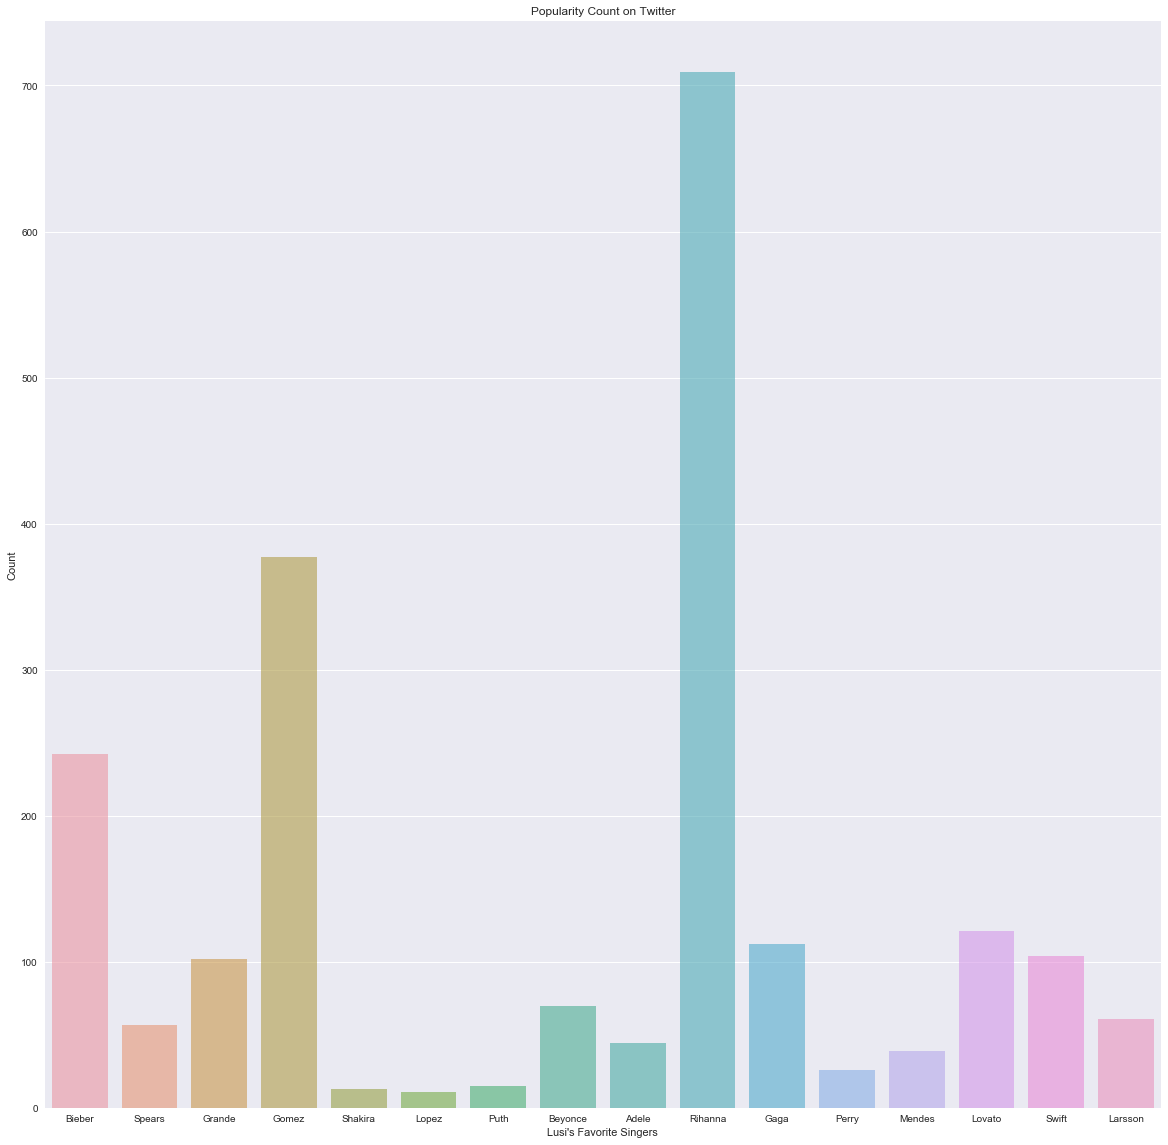

In [35]:
import re

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

# Initialize list to store tweet counts
[Bieber, Spears, Grande, Gomez, Shakira, Lopez, Puth, Beyonce, Adele, Rihanna, Gaga, Perry, Mendes, Lovato, Swift, Larsson] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    Bieber += word_in_text('Justin Bieber', row['text'].lower())
    Spears += word_in_text('Britney Spears', row['text'].lower())
    Grande += word_in_text('Ariana Grande', row['text'].lower())
    Gomez += word_in_text('Selena Gomez', row['text'].lower())
    Shakira += word_in_text('Shakira', row['text'].lower())
    Lopez += word_in_text('Jennifer Lopez', row['text'].lower())
    Puth += word_in_text('Charlie Puth', row['text'].lower())
    Beyonce += word_in_text('Beyonce', row['text'].lower())
    Adele += word_in_text('Adele', row['text'].lower())
    Rihanna += word_in_text('Rihanna', row['text'].lower())
    Gaga += word_in_text('Lady Gaga', row['text'].lower())
    Perry += word_in_text('Katy Perry', row['text'].lower())
    Mendes += word_in_text('Shawn Mendes', row['text'].lower())
    Lovato += word_in_text('Demi Lovato', row['text'].lower())
    Swift+= word_in_text('Taylor Swift', row['text'].lower())
    Larsson += word_in_text('Zara Larsson', row['text'].lower())
print (Bieber, Spears, Grande, Gomez, Shakira, Lopez, Puth, Beyonce, Adele, Rihanna, Gaga, Perry, Mendes, Lovato, Swift, Larsson)

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['Bieber', 'Spears', 'Grande', 'Gomez', 'Shakira', 'Lopez','Puth', 'Beyonce', 'Adele', 'Rihanna', 'Gaga', 'Perry', 'Mendes', 'Lovato', 'Swift', 'Larsson']

# Plot histogram
plt.figure(figsize=(20, 20))
ax = sns.barplot(cd, [Bieber, Spears, Grande, Gomez, Shakira, Lopez, Puth, Beyonce, Adele, Rihanna, Gaga, Perry, Mendes, Lovato, Swift, Larsson],alpha=.6)
ax.set(ylabel="Count")
ax.set(xlabel="Lusi's Favorite Singers")
ax.set_title('Popularity Count on Twitter')
plt.show()

Above is the data that I streamed on Monday Oct 31, 2017. RiRi seems to be the most popular/active singer on Twitter on this day. She is followed by Gomez and then Bieber. My current favoriate singer is Charlie Puth because he is my age and we can totally relate.

# Analyze My Twitter Account

Analyze My Followers

In [261]:
twitter_handle = 'lucieari'

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

import csv 

f = csv.writer(open('myfollowers.csv', 'w'))

f.writerow(["screenName", "name", "location", "description"])

users = tweepy.Cursor(api.followers, screen_name=twitter_handle, count = 200).items()

for u in users:
    screenName = u.screen_name
    name = u.name
    location = u.location
    description = u.description
    f.writerow([screenName, name, location, description, ])

In [262]:
import pandas as pd
df = pd.read_csv('myfollowers.csv')

In [263]:
df.head(5)

,screenName,name,location,description
0,BelleVEX,Belle VEX,"New York, NY",Recording artist. Listen to my music on Spotif...
1,benlandis,Ben Landis,Los Angeles,CEO at Fanbase
2,AdamBuschbacher,Adam Buschbacher,United States,Original Thinker Turning Ideas Into Reality. F...
3,HealthlinkNY,HealthlinkNY,Hudson Valley & Southern Tier,Your link to Statewide Health Information. Con...
4,Faye_I_Am,Faye Lewis,London,"Half Iago, half Fu Manchu... all bastard! Head..."


In [264]:
len(df)

149

The length of the dataset is 149, which means I have only the info of 149 of my followers. Since I have the database of my followers, I can tell who unfollowed me by comparing the new csv file with the old csv file. 

Look for CEO and Founder Followers

In [103]:
def word(text):
    if 'CEO' in str(text):
        return True
    else:
        return False
sum(df['description'].apply(lambda text: word(text)))

4

In [104]:
def word(text):
    if 'Founder' in str(text):
        return True
    else:
        return False
sum(df['description'].apply(lambda text: word(text)))

7

Adding them up, I have 11 CEO & Founders followers on my Twitter account. 

Look for users who put their location as "United States". 

In [109]:
def word(text):
    if 'United States' in str(text):
        return True
    else:
        return False
sum(df['location'].apply(lambda text: word(text)))

5

# Find the Twitter Trend 

Find the current top hashtags on October 30, 2017 at around 6:35PM EST. 

In [64]:
trends = api.trends_place(1)
data = trends[0] 

In [65]:
# Call up the key "trends" of the dictionary
trends = data['trends']

In [66]:
# Extract the name of the hashtag
names = [trend['name'] for trend in trends]
# Extract the tweet_volume from trends
tweet_volume = [trend['tweet_volume'] for trend in trends]
# Extract url from trends
url = [trend['url'] for trend in trends]
# Create a dataframe from the above live data
data = [names, tweet_volume, url]
df = pd.DataFrame(data, index = ['Hashtag', 'Total Tweets', 'url'])
df = df.T.head(5)
df

,Hashtag,Total Tweets,url
0,#OTGala1,47303,http://twitter.com/search?q=%23OTGala1
1,#GFvip,137902,http://twitter.com/search?q=%23GFvip
2,House of Cards,119739,http://twitter.com/search?q=%22House+of+Cards%22
3,#الحياه_في_سطر,90139,http://twitter.com/search?q=%23%D8%A7%D9%84%D8...
4,#OneDirectionEnMTVHITS,12989,http://twitter.com/search?q=%23OneDirectionEnM...


The above dataset changes all the time because the data is live from Twitter. 

Average Number of Tweets of the top Hashtag of the moment

In [67]:
df['Total Tweets'].mean()

81614.399999999994

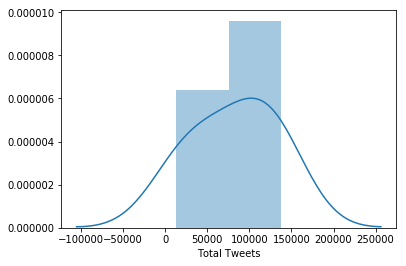

In [68]:
%matplotlib inline
# Seaborn package
import seaborn as sns
df['Total Tweets'].mean()
newTT = df['Total Tweets'].fillna(df['Total Tweets'].mean())
sns.distplot(newTT)

The above distribution shows that popular hashtags have around 80,000 tweets at this time. 

# This will be the end of my first Twitter Analytics Fever. 